In [1]:
from viper import ImagePatch
def bool_to_yesno(bool_answer:bool)-> str:
   return 'yes' if bool_answer else 'no'



/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

from PIL import Image 
import matplotlib.pyplot as plt
def display_example(image_id,question,answer):
    #question_id = list(question_id_to_image_id.keys())[idx]
    print('Image Id: ', image_id)
    print('Question:',question)
    print('Correct Answer:', answer)
    img = Image.open(f'/home/michal5/data/gqa/images/{image_id}.jpg')
    plt.imshow(img)

Image Id:  2325450
Question: Does the shirt have black color?
Correct Answer: Yes


/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/models/owlvit/image_processing_owlvit.py:355: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


No patches found


Loading checkpoint shards: 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]


Predicted answer: yes


/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


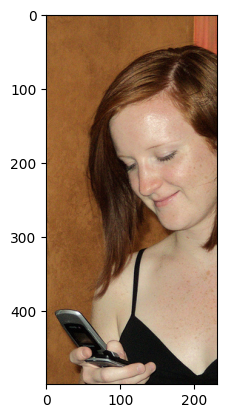

In [3]:
#question 1 
from PIL import Image
import numpy as np  
import cv2
display_example('2325450','Does the shirt have black color?','Yes')
image = cv2.imread('/home/michal5/data/gqa/images/2325450.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))
def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    shirt_patches = image_patch.find("shirt")
    # Question assumes only one shirt patch
    if len(shirt_patches) == 0:
        print('No patches found')
        # If no shirt is found, query the image directly
        return image_patch.simple_query("Does the shirt have black color?")
    return bool_to_yesno(shirt_patches[0].verify_property("shirt", "black"))
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')

Image Id:  2353927
Question: Are there any squirrels near the can?
Correct Answer: No
Predicted answer: no


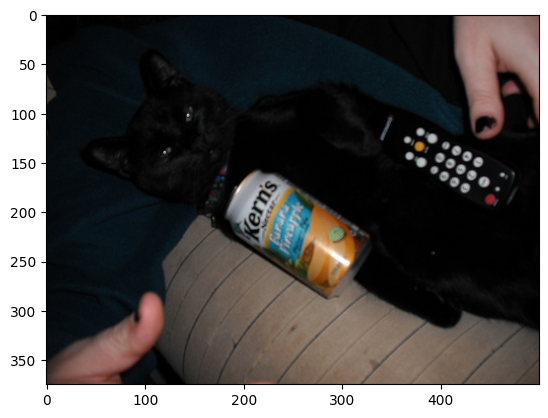

In [4]:
from PIL import Image
import numpy as np  
import cv2
display_example('2353927','Are there any squirrels near the can?','No')
image = cv2.imread('/home/michal5/data/gqa/images/2353927.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))
def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    can_patches = image_patch.find("can")
    if len(can_patches) == 0:
        return image_patch.simple_query("Are there any squirrels near the can?")
    can_patch = can_patches[0]
    squirrel_patches = image_patch.find("squirrel")
    for squirrel_patch in squirrel_patches:
        if can_patch.overlaps_with(squirrel_patch.left, squirrel_patch.lower, squirrel_patch.right, squirrel_patch.upper):
            return "yes"
    return "no"
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')

Image Id:  2401706
Question: Is the fence silver?
Correct Answer: No
(333, 500, 3)
5


/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352463056/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Loading pretrained vision encoder
### Loading pretrained text encoder
load checkpoint from /home/michal5/pretrained_models/xvlm/checkpoint_9.pth
missing_keys:  []
unexpected_keys:  []
Predicted answer: yes


/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


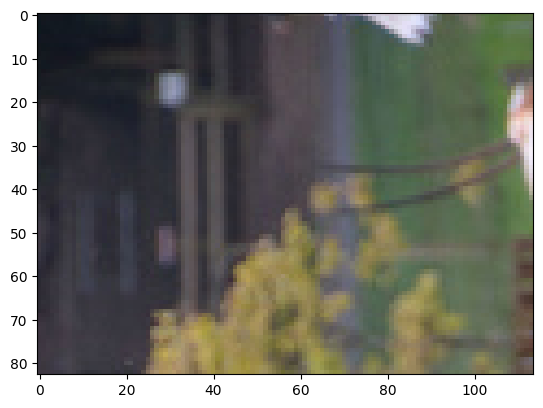

In [5]:
from PIL import Image
import numpy as np  
import cv2
display_example('2401706','Is the fence silver?','No')
image = cv2.imread('/home/michal5/data/gqa/images/2401706.jpg')
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))
def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    fence_patches = image_patch.find("fence")
    print(len(fence_patches))
    if len(fence_patches) == 0:
        return image_patch.simple_query("Is the fence silver?")
    img_to_show = np.transpose(fence_patches[1].cropped_image,(2,1,0))
    plt.imshow(img_to_show)
    return bool_to_yesno(fence_patches[1].verify_property("fence","silver"))
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')
#incorrect because property verification failed 

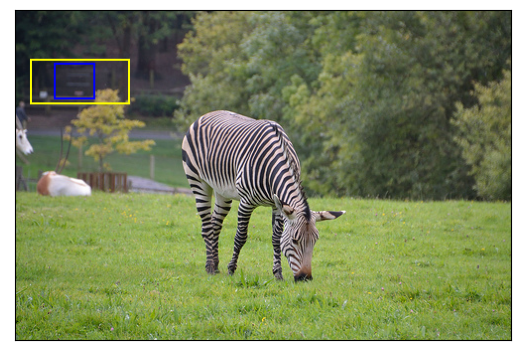

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
img_1 = read_image('/home/michal5/data/gqa/images/2401706.jpg')

boxes = torch.tensor([[39, 333-279, 80, 333-243], [15, 333-283, 115, 333-238]], dtype=torch.float)
colors = ["blue", "yellow"]
result = draw_bounding_boxes(img_1, boxes, colors=colors, width=2)
show(result)

Image Id:  2398544
Question: Are there any sheep that are not white?
Correct Answer: yes
### Loading pretrained vision encoder
### Loading pretrained text encoder
load checkpoint from /home/michal5/pretrained_models/xvlm/checkpoint_9.pth
missing_keys:  []
unexpected_keys:  []
### Loading pretrained vision encoder
### Loading pretrained text encoder
load checkpoint from /home/michal5/pretrained_models/xvlm/checkpoint_9.pth
missing_keys:  []
unexpected_keys:  []
### Loading pretrained vision encoder
### Loading pretrained text encoder
load checkpoint from /home/michal5/pretrained_models/xvlm/checkpoint_9.pth
missing_keys:  []
unexpected_keys:  []
Predicted answer: no


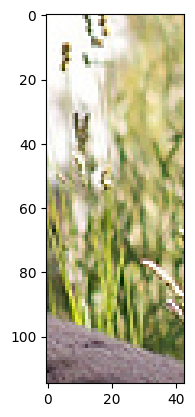

In [6]:
from PIL import Image
import numpy as np  
import cv2
display_example('2398544','Are there any sheep that are not white?','yes')
image = cv2.imread('/home/michal5/data/gqa/images/2398544.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))

def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    sheep_patches = image_patch.find("sheep")
    

    img_to_show = np.transpose(sheep_patches[1].cropped_image,(1,2,0))
    plt.imshow(img_to_show)
    for sheep_patch in sheep_patches:
        if not sheep_patch.verify_property("sheep","white"):
            return "yes"
    return "no"
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')
#need .1 threshold and attribute problem 


Image Id:  2352698
Question: Are there any cars?
Correct Answer: no
Predicted answer: no


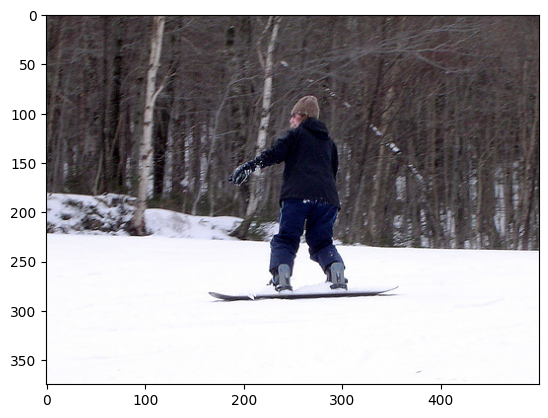

In [7]:
from PIL import Image
import numpy as np  
import cv2
display_example('2352698','Are there any cars?','no')
image = cv2.imread('/home/michal5/data/gqa/images/2352698.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))

def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    return bool_to_yesno(image_patch.exists("car"))
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')

Image Id:  2396702
Question: Are there any large plates?
Correct Answer: yes
Predicted answer: yes


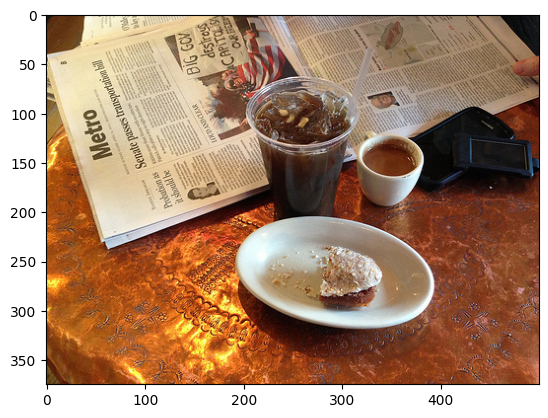

In [8]:
display_example('2396702','Are there any large plates?','yes')
image = cv2.imread('/home/michal5/data/gqa/images/2396702.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))

def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    return bool_to_yesno(image_patch.exists("large plate"))
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')

Image Id:  2405561
Question: Is the desktop computer to the right of the book?
Correct Answer: yes
11 desktop patches
8 book patchces
Predicted answer: no


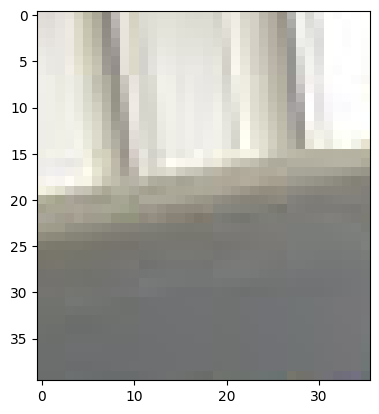

In [10]:
display_example('2405561','Is the desktop computer to the right of the book?','yes')
image = cv2.imread('/home/michal5/data/gqa/images/2405561.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))

def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    desktop_patches = image_patch.find("desktop computer")
    book_patches = image_patch.find("book")
    print(len(desktop_patches),'desktop patches')
    print(len(book_patches),'book patchces')
    if len(desktop_patches) == 0 or len(book_patches) == 0:
    
        return image_patch.simple_query("Is the desktop computer to the right of the book?")
    desktop_patch = desktop_patches[0]
    book_patch = book_patches[0]
    img_to_show = np.transpose(book_patches[2].cropped_image,(1,2,0))
    plt.imshow(img_to_show)
    return bool_to_yesno(desktop_patch.horizontal_center > book_patch.horizontal_center)
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')
#consistent mistake is only looking at single patch

Image Id:  4910
Question: Is the mirror above a sink?
Correct Answer: no


Loading checkpoint shards: 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]


Predicted answer: no


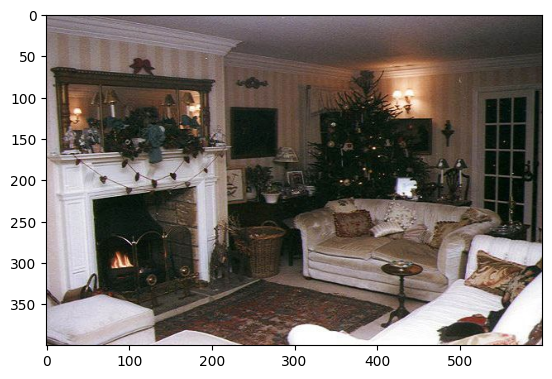

In [9]:
display_example('4910','Is the mirror above a sink?','no')
image = cv2.imread('/home/michal5/data/gqa/images/4910.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))
def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    sink_patches = image_patch.find("sink")
    if len(sink_patches) == 0:
        return image_patch.simple_query("Is the mirror above a sink?")
    mirror_patches = image_patch.find("mirror")
    for mirror in mirror_patches:
        if mirror.vertical_center < sink_patches[0].vertical_center:
            return bool_to_yesno(True)
    return bool_to_yesno(False)
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')
#would need to exit after sink 

Image Id:  2349031
Question: Are there any curtains to the right of the speaker?
Correct Answer: no


/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/models/owlvit/image_processing_owlvit.py:355: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


0 length of speaker patches


Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.30s/it]


Predicted answer: no curtains


/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


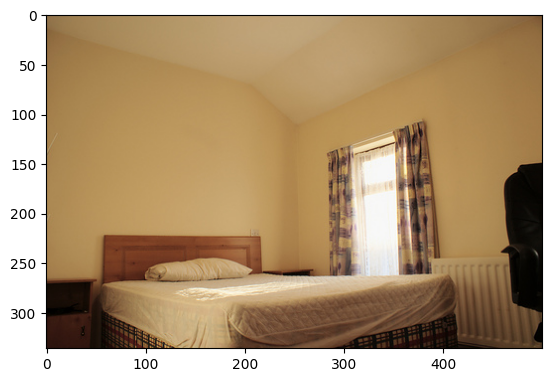

In [12]:
display_example('2349031','Are there any curtains to the right of the speaker?','no')
image = cv2.imread('/home/michal5/data/gqa/images/2349031.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))
def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    speaker_patches = image_patch.find("speaker")
    print(len(speaker_patches),'length of speaker patches')
    if len(speaker_patches) == 0:
        return image_patch.simple_query("Are there any curtains to the right of the speaker?")
    speaker_patch = speaker_patches[0]
    speaker_right = speaker_patch.right
    speaker_lower = speaker_patch.lower
    speaker_upper = speaker_patch.upper
    speaker_center = speaker_patch.horizontal_center
    speaker_height = speaker_patch.height
    speaker_width = speaker_patch.width
    speaker_area = speaker_height * speaker_width
    curtain_patches = image_patch.find("curtain")
    for curtain_patch in curtain_patches:
        if curtain_patch.left > speaker_right:
            return bool_to_yesno(True)
    return bool_to_yesno(False)
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')

Image Id:  2391289
Question: Are there any marshmallows in this image?
Correct Answer: no
Predicted answer: no curtains


/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/models/owlvit/image_processing_owlvit.py:355: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


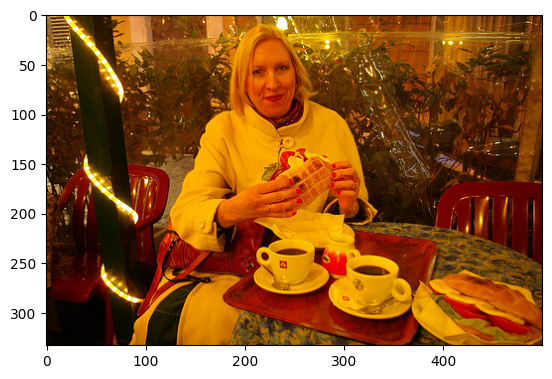

In [13]:
display_example('2391289','Are there any marshmallows in this image?','no')
image = cv2.imread('/home/michal5/data/gqa/images/2391289.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))
def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    return bool_to_yesno(image_patch.exists("marshmallow"))
predictd_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')

Image Id:  2403950
Question: Are there black helmets in this image?
Correct Answer: yes
Predicted answer: yes


/home/michal5/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/models/owlvit/image_processing_owlvit.py:355: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


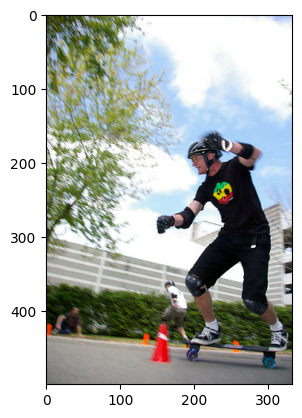

In [14]:
display_example('2403950','Are there black helmets in this image?','yes')
image = cv2.imread('/home/michal5/data/gqa/images/2403950.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.transpose(image,(2,0,1))
def execute_command(image) -> str:
    image_patch = ImagePatch(image)
    return bool_to_yesno(image_patch.exists("black helmet"))
predicted_answer = execute_command(image)
print(f'Predicted answer: {predicted_answer}')

